#MLP Mulit-layer Perceptron

klocki lego składamy liniowe, relu, liniowe i sigmoida, dzięki czemu uczymy się bogatszej reprezentacji w której możemy lepiej rozdzielać dane.

Epoch 0, Loss: 1.3223341703414917
Epoch 10, Loss: 0.25158587098121643
Epoch 20, Loss: 0.16579551994800568
Epoch 30, Loss: 0.14874660968780518
Epoch 40, Loss: 0.13866664469242096
Epoch 50, Loss: 0.1315731704235077
Epoch 60, Loss: 0.12608709931373596
Epoch 70, Loss: 0.12152672559022903
Epoch 80, Loss: 0.11768234521150589
Epoch 90, Loss: 0.11437640339136124
Test Accuracy: 0.9800


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


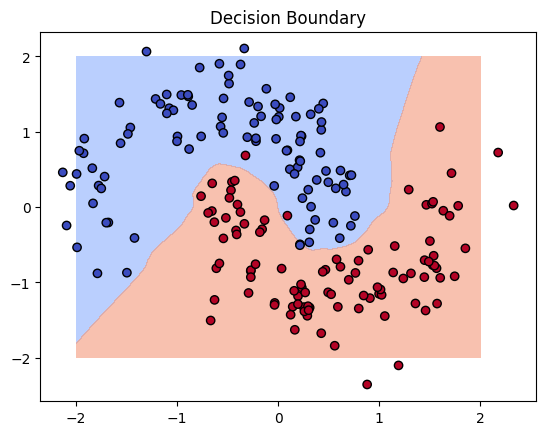

In [1]:
# dla prostoty robimy ręczną optymalizację modelu MLP, proszę zobaczyć jak się zmienia wynik jak jest za mały wymiar warstwy ukrytej

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generowanie danych
data, labels = make_moons(n_samples=1000, noise=0.2, random_state=42)
scaler = StandardScaler()
data = scaler.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Konwersja do tensorów
X_train, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_test)
y_train, y_test = torch.FloatTensor(y_train).reshape(-1, 1), torch.FloatTensor(y_test).reshape(-1, 1)

# Inicjalizacja wag

# wymiar warstwy ukrytej
dim_hidden=100
w1 = torch.randn(2, dim_hidden, requires_grad=True)
b1 = torch.zeros(dim_hidden, requires_grad=True)
w2 = torch.randn(dim_hidden, 1, requires_grad=True)
b2 = torch.zeros(1, requires_grad=True)

# Funkcja aktywacji ReLU
def relu(x):
    return torch.maximum(x, torch.tensor(0.0))

# Sigmoid
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Funkcja straty Binary Cross Entropy
def binary_cross_entropy(pred, target):
    return -torch.mean(target * torch.log(pred + 1e-8) + (1 - target) * torch.log(1 - pred + 1e-8))

# Klasyczna optymalizacja gradientowa
learning_rate = 0.1
epochs = 100
for epoch in range(epochs):
    # Forward pass
    z1 = X_train @ w1 + b1
    a1 = relu(z1)
    z2 = a1 @ w2 + b2
    y_pred = sigmoid(z2)

    # Obliczenie straty
    loss = binary_cross_entropy(y_pred, y_train)

    # Backpropagation
    loss.backward()

    # Ręczna aktualizacja wag
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad

        # Zerowanie gradientów
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Ewaluacja modelu
with torch.no_grad():
    z1 = X_test @ w1 + b1
    a1 = relu(z1)
    z2 = a1 @ w2 + b2
    test_outputs = sigmoid(z2)
    test_preds = (test_outputs > 0.5).float()
    accuracy = (test_preds == y_test).float().mean()
    print(f'Test Accuracy: {accuracy:.4f}')

# Wizualizacja wyników
xx, yy = torch.meshgrid(torch.linspace(-2, 2, 100), torch.linspace(-2, 2, 100))
grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
with torch.no_grad():
    z1 = grid @ w1 + b1
    a1 = relu(z1)
    z2 = a1 @ w2 + b2
    zz = sigmoid(z2).reshape(100, 100)

plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.6, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test[:, 0], edgecolor='k', cmap='coolwarm')
plt.title('Decision Boundary')
plt.show()
